In [0]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#nltk.download_shell()

In [0]:
sms_headers = ['word_freq_make',
'word_freq_address',
'word_freq_all',
'word_freq_3d',
'word_freq_our',          
'word_freq_over',         
'word_freq_remove',       
'word_freq_internet',     
'word_freq_order',
'word_freq_mail',
'word_freq_receive',
'word_freq_will',
'word_freq_people',
'word_freq_report',
'word_freq_addresses',
'word_freq_free',
'word_freq_business',
'word_freq_email',
'word_freq_you',
'word_freq_credit',
'word_freq_your',
'word_freq_font',
'word_freq_000',
'word_freq_money',
'word_freq_hp',
'word_freq_hpl',
'word_freq_george',
'word_freq_650',
'word_freq_lab',
'word_freq_labs',
'word_freq_telnet',
'word_freq_857',
'word_freq_data',
'word_freq_415',
'word_freq_85',
'word_freq_technology',
'word_freq_1999',
'word_freq_parts',
'word_freq_pm',
'word_freq_direct',
'word_freq_cs',
'word_freq_meeting',
'word_freq_original',
'word_freq_project',
'word_freq_re',
'word_freq_edu',
'word_freq_table',
'word_freq_conference',
'char_freq_;',
'char_freq_( ',
'char_freq_[',
'char_freq_!',
'char_freq_$',
'char_freq_#',
'capital_run_length_average',
'capital_run_length_longest',
'capital_run_length_total']

In [0]:
#sms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=sms_headers)

#Data Exploration

In [0]:
import urllib,io,zipfile

In [0]:
tmpFile = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip')

In [0]:
tmpFile = zipfile.ZipFile(io.BytesIO(tmpFile.read()))

In [0]:
sms = pd.read_table(io.BytesIO(tmpFile.read('SMSSpamCollection')),names=['class', 'message'])

tmpFile.close()

In [17]:
#messages = [line.rstrip() for line in open('sms')]
print(len(sms))

5571


In [33]:
sms.head()

,class,message,sms_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
sms.describe()

,class,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [31]:
sms.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [0]:
sms['sms_length'] = sms['message'].apply(len)

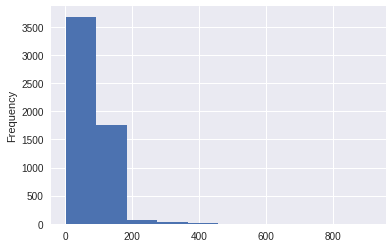

In [35]:
sms['sms_length'].plot.hist()

In [39]:
sms[sms['sms_length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f440aba8048>,
      dtype=object)

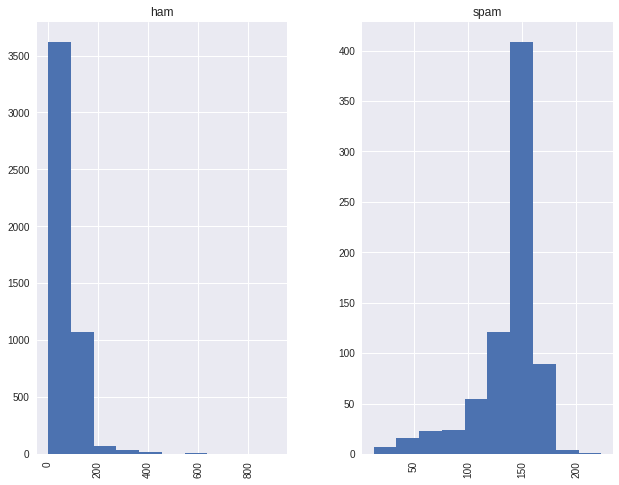

In [41]:
sms.hist(column='sms_length', by='class', figsize=(10,8))

#Data PreProcessing

In [0]:
import string
from nltk.corpus import stopwords

In [0]:
def text_processing(message):
  """
  1. Remove Punctuations
  2. Remove Stop words
  3. Return list of clean text words
  """
  nopunc = [char for char in message if char not in string.punctuation]
  
  nopunc = ''.join(nopunc)
  
  return[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [0]:
#Tokenize the messages
 from sklearn.feature_extraction.text import CountVectorizer

In [0]:
bow_transformer = CountVectorizer(analyzer=text_processing).fit(sms['message'])

In [48]:
print(len(bow_transformer.vocabulary_))

11425


In [0]:
message_example1 = sms['message'][50]

In [55]:
bagofwords1 = bow_transformer.transform([message_example1])
print(bagofwords1)

  (0, 1918)	1
  (0, 5527)	1
  (0, 9553)	1
  (0, 10435)	1
  (0, 10487)	1


In [56]:
bow_transformer.get_feature_names()[5527]

'class'

In [0]:
sms_bow = bow_transformer.transform(sms['message'])

#Tf-Idf

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer

In [0]:
sms_tfidf = TfidfTransformer().fit(sms_bow)

In [64]:
tfidf_ex = sms_tfidf.transform(bagofwords1)
print(tfidf_ex)

  (0, 10487)	0.2898795583055412
  (0, 10435)	0.5870564953415602
  (0, 9553)	0.4294641708971437
  (0, 5527)	0.3854206695192049
  (0, 1918)	0.4882068684245089


In [66]:
sms_tfidf.idf_[bow_transformer.vocabulary_['mobile']]

4.971728437412013

In [0]:
all_sms_tfidf = sms_tfidf.transform(sms_bow)

# Naive-Bayes Classifier

In [0]:
from sklearn.naive_bayes import MultinomialNB

In [0]:
spam_detect_model = MultinomialNB()

In [71]:
spam_detect_model.fit(all_sms_tfidf, sms['class'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
spam_predict = spam_detect_model.predict(all_sms_tfidf)

In [75]:
spam_predict

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

# Build the Pipeline

In [0]:
from sklearn.cross_validation import train_test_split

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [0]:
pipeline.fit(sms_train, class_train)

In [0]:
pipe_predict = pipeline.predict(sms_test)

In [0]:
from sklearn.metrics import classification_report

In [0]:
print(classification_report('class_test', pipe_predict))